In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os

In [12]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
your_name = "prem_pawar"
base_path = f"/content/drive/MyDrive/ds_{your_name}"
csv_path = f"{base_path}/csv_files"
outputs_path = f"{base_path}/outputs"


In [14]:
os.makedirs(csv_path, exist_ok=True)
os.makedirs(outputs_path, exist_ok=True)

In [20]:
fear_greed_df = pd.read_csv("fear_greed_index.csv")
historical_df = pd.read_csv("historical_data.csv")


In [21]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_df['date'] = pd.to_datetime(historical_df['Timestamp IST'], format="%d-%m-%Y %H:%M")


In [22]:
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date
historical_df['date_only'] = historical_df['date'].dt.date

In [23]:
merged_df = pd.merge(historical_df, fear_greed_df[['date_only', 'classification']], on='date_only', how='left')

In [24]:
merged_df = merged_df.dropna(subset=['classification'])



In [25]:
sentiment_summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Size USD': ['mean', 'sum'],
    'Execution Price': 'mean',
    'Side': 'count'
}).reset_index()

In [26]:
sentiment_summary.columns = ['Sentiment', 'Avg PnL', 'Total PnL', 'Avg Volume', 'Total Volume', 'Avg Price', 'Trade Count']

In [27]:
sentiment_summary.to_csv(f"{csv_path}/sentiment_summary.csv", index=False)

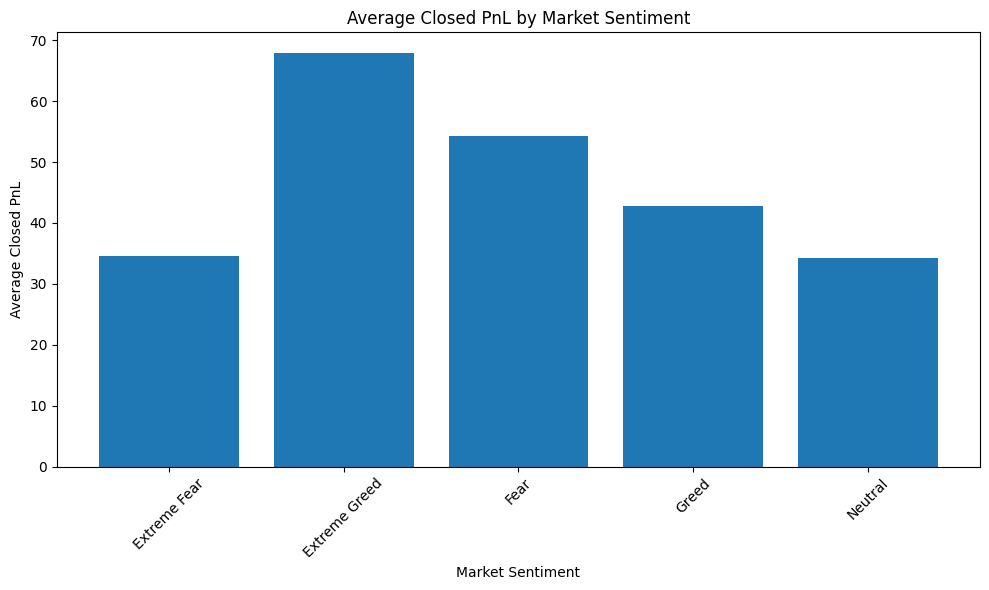

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(sentiment_summary['Sentiment'], sentiment_summary['Avg PnL'])
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{outputs_path}/outputs_avg_pnl_by_sentiment.png")
plt.show()